In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
np.random.seed(1)

In [3]:
def rnorm(number_of_elements, mean=0, variance_squared=1): 
    return math.sqrt(variance_squared) * np.random.randn(number_of_elements) + mean

## Ex a)

In [4]:
x1 = np.random.uniform(size=100)
x2 = [0.5 * x + 0.1 * e for x, e in zip(x1, rnorm(100))]
y = [2 + 2 * x_1 + 0.3 * x_2 + e for x_1, x_2, e in zip(x1, x2, rnorm(100))]

$Y = 2 + 2 \cdot X_1 + 0.3 \cdot X_2 + e$

$\beta_0 = 2, \beta_1=2, \beta_2=0.3$


## Ex b)

In [6]:
data = {'x1': x1, 'x2': x2, 'y': y}
df = pd.DataFrame(data)
df.corr()

,x1,x2,y
x1,1.000000,0.839060,0.473077
x2,0.839060,1.000000,0.501172
y,0.473077,0.501172,1.000000


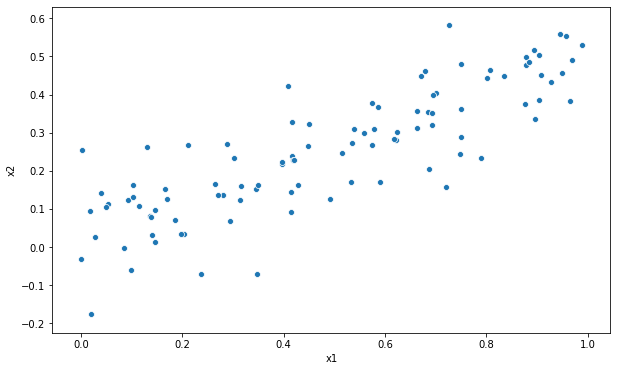

In [7]:
fig = plt.figure(figsize=(10, 6))
plot = sns.scatterplot(x='x1', y='x2', data=df)

Variables are highly correlated - about $0.8$.

## Ex c)

In [8]:
model = sm.OLS.from_formula('y ~ x1 + x2', data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           4.40e-07
Time:                        11:43:43   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1893      0.199     11.021      0.000       1.795       2.584
x1             0.7046      0.637      1.107      0.271      -0.559       1.968
x2             2.5024      1.140      2.194      0.031       0.239       4.766
==============================================================================
Omnibus:                        0.607   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.577
Skew:                          -0.179   Prob(JB):                        0.749
Kurtosis:                       2.900   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
p_value_beta_0 = results.pvalues['Intercept']
p_value_beta_1 = results.pvalues['x1']
p_value_beta_2 = results.pvalues['x2']
print(f'p-values: beta_0 = {p_value_beta_0} beta_1 = {p_value_beta_1} beta_2 = {p_value_beta_2}')

p-values: beta_0 = 8.532402565543744e-19 beta_1 = 0.27121461642160377 beta_2 = 0.030604176453188893


First hypothesis can be rejected since their value is smaller than 5%.

Second one is way bigger than 0.05 - we can't reject it.

## Ex d)

In [12]:
model = sm.OLS.from_formula('y ~ x1', data)
results_d = model.fit()
print(results_d.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           6.68e-07
Time:                        11:47:12   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2486      0.201     11.209      0.0

Can we reject null hypothesis $H_0: \beta_1 = 0$?

In [13]:
results_d.pvalues['x1'] * 100

6.683125429060447e-05

Yes - value is smaller than 5%.

## Ex e)

In [14]:
model = sm.OLS.from_formula('y ~ x2', data)
results_e = model.fit()
print(results_e.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           1.09e-07
Time:                        11:47:27   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2655      0.187     12.145      0.0

In [15]:
results_e.pvalues

Intercept    2.952030e-21
x2           1.090964e-07
dtype: float64

The value of p-value is too low - we reject the hypothesis.

## Ex f)

No, different results of $y \approx x_1$, $y \approx x_2$ and $y \approx x_1 + x_2$ do not contradict.
The values of $x_1$ and $x_2$ are highly correlated.

The more clear view on effect of regression is achieved when regressed separately - the reason behind that is the collinearity of both variables.

## Ex g)

A data point has high leverage if it has ”extreme” predictor x values.

An outlier is a data point whose response y does not follow the general trend of
the rest of the data

In [35]:
x1 = np.append(x1, 0.1)
x2 = np.append(x2, 0.8)
y = np.append(y, 6)

In [36]:
data = {'x1': x1, 'x2': x2}
df = pd.DataFrame(data)
df.corr()

,x1,x2
x1,1.000000,0.748839
x2,0.748839,1.000000


### $y \approx x_1 + x_2$

In [37]:
model = sm.OLS.from_formula('y ~ x1 + x2', data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     19.92
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           5.51e-08
Time:                        20:25:57   Log-Likelihood:                -144.15
No. Observations:                 101   AIC:                             294.3
Df Residuals:                      98   BIC:                             302.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1996      0.199     11.041      0.000       1.804       2.595
x1             0.2200      0.520      0.423      0.673      -0.812       1.252
x2             3.4392      0.892      3.857      0.000       1.670       5.209
==============================================================================
Omnibus:                        1.246   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                1.094
Skew:                          -0.254   Prob(JB):                        0.579
Kurtosis:                       2.956   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### $y \approx x_1$

In [15]:
model = sm.OLS.from_formula('y ~ x1', data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     21.89
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           9.15e-06
Time:                        14:30:21   Log-Likelihood:                -151.28
No. Observations:                 101   AIC:                             306.6
Df Residuals:                      99   BIC:                             311.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3583      0.208     11.331      0.000       1.945       2.771
x1             1.7225      0.368      4.679      0.000       0.992       2.453
==============================================================================
Omnibus:                        1.904   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.386   Jarque-Bera (JB):                1.388
Skew:                           0.263   Prob(JB):                        0.500
Kurtosis:                       3.232   Cond. No.                         4.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### $y \approx x_2$

In [16]:
model = sm.OLS.from_formula('y ~ x2', data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     39.99
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           7.41e-09
Time:                        14:30:21   Log-Likelihood:                -144.24
No. Observations:                 101   AIC:                             292.5
Df Residuals:                      99   BIC:                             297.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2331      0.182     12.271      0.000       1.872       2.594
x2             3.7216      0.589      6.324      0.000       2.554       4.889
==============================================================================
Omnibus:                        1.271   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                1.094
Skew:                          -0.255   Prob(JB):                        0.579
Kurtosis:                       2.973   Cond. No.                         6.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""